# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Rika Rahma
- **Email:** rikaarahmaa26@gmail.com
- **ID Dicoding:** rikarahmaa26

## Menentukan Pertanyaan Bisnis

- Questions 1 : What is the trend of monthly orders in the dataset? How does it change over time?

- Questions 2 : What are the most frequently used payment methods? How significant is the distribution of each?

## Import Semua Packages/Library yang Digunakan

Dalam bagian ini, kita akan mengimpor semua pustaka yang diperlukan untuk analisis data, termasuk pandas untuk manipulasi data, matplotlib dan seaborn untuk visualisasi, geopandas dan folium untuk analisis geospasial, serta modul datetime untuk pengolahan tanggal.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium
from google.colab import drive
from datetime import datetime

## Data Wrangling

### Gathering Data

Dalam langkah ini, akan memuat dataset yang diperlukan dari Google Drive untuk analisis. Kita akan memeriksa file CSV untuk memastikan bahwa semua data tersedia untuk analisis selanjutnya.

In [3]:
# Mounting Google Drive
drive.mount('/content/gdrive')

# Loading datasets with the correct paths
data_customers = pd.read_csv('/content/gdrive/MyDrive/Colab_Notebooks/E-Commerce_Dataset/customers_dataset.csv')
data_geolocation = pd.read_csv('/content/gdrive/MyDrive/Colab_Notebooks/E-Commerce_Dataset/geolocation_dataset.csv')
data_order_items = pd.read_csv('/content/gdrive/MyDrive/Colab_Notebooks/E-Commerce_Dataset/order_items_dataset.csv')
data_order_payments = pd.read_csv('/content/gdrive/MyDrive/Colab_Notebooks/E-Commerce_Dataset/order_payments_dataset.csv')
data_order_reviews = pd.read_csv('/content/gdrive/MyDrive/Colab_Notebooks/E-Commerce_Dataset/order_reviews_dataset.csv')
data_orders = pd.read_csv('/content/gdrive/MyDrive/Colab_Notebooks/E-Commerce_Dataset/orders_dataset.csv')
data_product_category = pd.read_csv('/content/gdrive/MyDrive/Colab_Notebooks/E-Commerce_Dataset/product_category_name_translation.csv')

# Displaying the first few rows of the orders dataset
data_orders.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


**Insight:**
- Memastikan data telah dimuat dengan benar adalah langkah pertama yang kritis. Kesalahan pada tahap ini dapat menyebabkan masalah dalam analisis lebih lanjut.

### Assessing Data

Setelah memuat data, kita akan memeriksa apakah terdapat nilai yang hilang dalam dataset. Ini penting untuk memastikan integritas data sebelum melanjutkan dengan analisis lebih lanjut.

In [4]:
# Checking for missing values in the orders dataset
missing_values = data_orders.isnull().sum()
missing_values[missing_values > 0]

,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965


**Insight:**
- Menilai data untuk menemukan nilai yang hilang adalah langkah penting dalam data wrangling. Nilai yang hilang dapat mengurangi kualitas analisis, dan kita perlu memutuskan bagaimana menangani data tersebut.

### Cleaning Data

Di sini, kita akan menghapus baris yang memiliki nilai yang hilang pada kolom-kolom kritis. Membersihkan data adalah langkah penting untuk memastikan bahwa analisis yang dilakukan dapat diandalkan dan akurat.

In [5]:
# Dropping rows with missing values in critical columns
data_orders_cleaned = data_orders.dropna(subset=['order_id', 'order_status'])

# Checking the shape of the cleaned dataset
data_orders_cleaned.shape

(99441, 8)

**Insight:**
- Data yang bersih adalah dasar dari analisis yang baik. Menghapus nilai yang hilang pada kolom kritis mencegah pengaruh negatif pada hasil analisis.

## Exploratory Data Analysis (EDA)

Pada tahap ini, kita akan melakukan analisis eksplorasi data untuk mendapatkan wawasan awal dari dataset. Kami akan memeriksa bagaimana data terdistribusi dan melihat pola-pola yang mungkin ada.

### Explore ...

In [6]:
# Converting order_date to datetime format
data_orders_cleaned['order_purchase_timestamp'] = pd.to_datetime(data_orders_cleaned['order_purchase_timestamp'])

In [94]:
# Extracting month and year from the date
data_orders_cleaned['month_year'] = data_orders_cleaned['order_purchase_timestamp'].dt.to_period('M')

In [8]:
# Grouping by month and counting the number of orders
monthly_orders = data_orders_cleaned.groupby('month_year')['order_id'].count().reset_index()

In [9]:
# Analyzing the payment methods used
payment_method_counts = data_order_payments['payment_type'].value_counts()

**Insight:**
- EDA membantu kita memahami karakteristik dataset dan menemukan pola yang tidak terduga, yang dapat mengarah pada pertanyaan atau analisis tambahan.

## Visualization & Explanatory Analysis

### Pertanyaan 1: What is the trend of monthly orders in the dataset? How does it change over time?

Kita akan mengonversi tanggal pesanan ke dalam format yang dapat digunakan untuk analisis bulanan, kemudian menghitung jumlah pesanan untuk setiap bulan dan menggambarkan tren tersebut.

In [92]:
# Convert month_year to string or period if necessary
monthly_orders['month_year'] = monthly_orders['month_year'].astype(str)

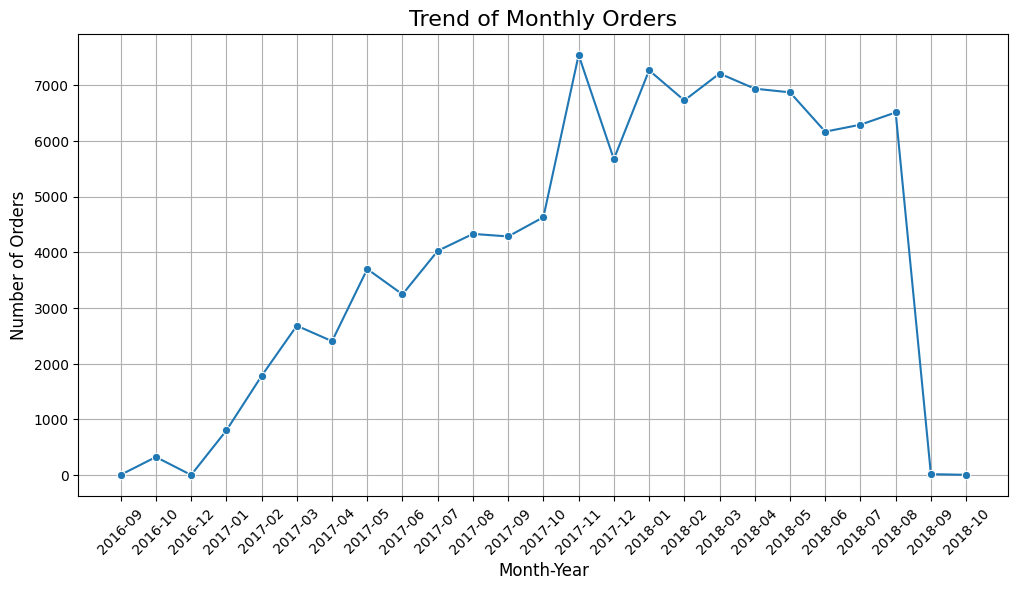

In [93]:
# Displaying the trend of monthly orders
plt.figure(figsize=(12, 6))
sns.lineplot(x='month_year', y='order_id', data=monthly_orders, marker='o')
plt.title('Trend of Monthly Orders', fontsize=16)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig('monthly_orders_trend.png')  # Save the figure
plt.show()

In [12]:
print(monthly_orders.dtypes)

month_year    object
order_id       int64
dtype: object


### Pertanyaan 2:  What are the most frequently used payment methods? How significant is the distribution of each?

Di sini, kita akan menganalisis metode pembayaran yang digunakan dan menyajikan data tersebut dalam bentuk grafik batang untuk menunjukkan distribusi frekuensi setiap metode.

<ipython-input-91-9ffa93058afb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_method_counts.index, y=payment_method_counts.values, palette='viridis')


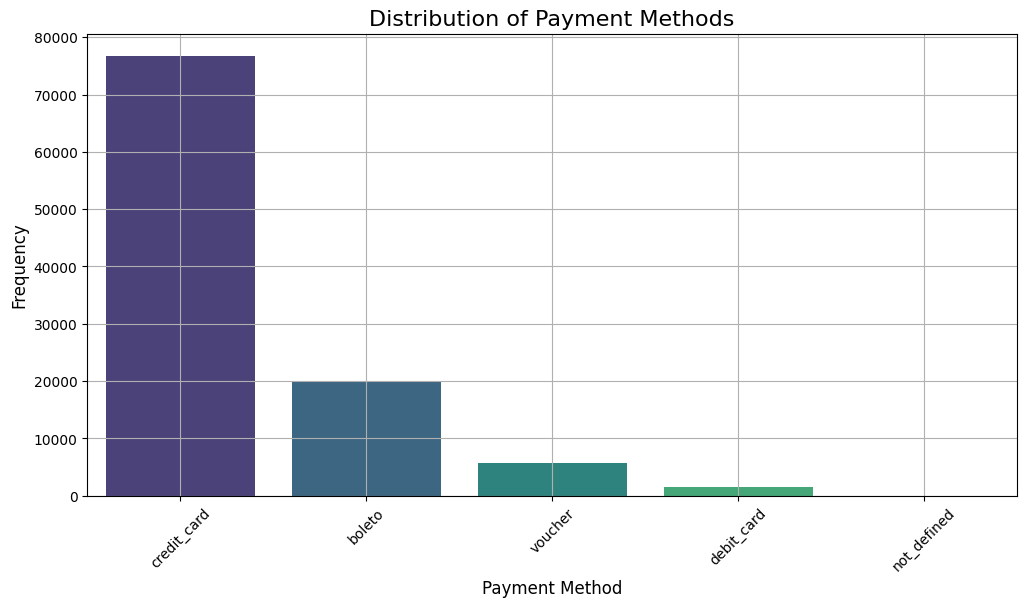

In [91]:
# Distribution of payment methods
payment_method_counts = data_order_payments['payment_type'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=payment_method_counts.index, y=payment_method_counts.values, palette='viridis')
plt.title('Distribution of Payment Methods', fontsize=16)
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig('payment_methods_distribution.png')  # Save the figure
plt.show()

**Insight:**
- Dengan menganalisis tren bulanan, kita dapat mengidentifikasi periode puncak penjualan dan periode sepi. Hal ini dapat membantu dalam perencanaan inventaris dan strategi pemasaran.
- Memahami metode pembayaran yang paling populer dapat membantu dalam meningkatkan pengalaman pelanggan dengan menyediakan opsi yang lebih relevan dan sesuai kebutuhan.

## Analisis Lanjutan (Opsional)

## RFM Analysis

Analisis RFM bertujuan untuk mengelompokkan pelanggan berdasarkan perilaku pembelian mereka. Tiga faktor utama yang dianalisis adalah:
- **Recency:** Jumlah hari sejak terakhir kali pelanggan melakukan pembelian.
- **Frequency:** Jumlah total transaksi yang dilakukan oleh pelanggan dalam periode tertentu.
- **Monetary:** Total pengeluaran pelanggan dalam periode tersebut.

In [31]:
# RFM Analysis
# Ensure 'order_purchase_timestamp' is in datetime format
data_orders_cleaned['order_purchase_timestamp'] = pd.to_datetime(data_orders_cleaned['order_purchase_timestamp'], errors='coerce')

In [87]:
# Set snapshot date to one day after the last purchase date
snapshot_date = data_orders_cleaned['order_purchase_timestamp'].max() + pd.Timedelta(days=1)

In [86]:
# RFM Analysis without 'payment_value'
rfm = data_orders_cleaned.groupby('customer_id').agg({
    'order_purchase_timestamp': lambda x: (snapshot_date - x.max()).days,  # Recency
    'order_id': 'count'  # Frequency
}).rename(columns={
    'order_purchase_timestamp': 'Recency',
    'order_id': 'Frequency'
})


print(rfm.head())

                                  Recency  Frequency
customer_id                                         
9ef432eb6251297304e76186b10a928d      381          1
b0830fb4747a6c6d20dea0b8c802d7ef       85          1


**Insight:**
- RFM Analysis memungkinkan kita untuk mengenali pelanggan yang paling berharga. Ini membantu dalam mengarahkan upaya pemasaran dan meningkatkan loyalitas pelanggan.

## Geospatial Analysis

Analisis geospasial bertujuan untuk menganalisis data berdasarkan lokasi geografis. Kami akan menggunakan GeoPandas atau Folium untuk membuat peta yang menampilkan distribusi data berdasarkan lokasi, yang dapat membantu dalam mengidentifikasi tren atau pola tertentu.

In [48]:
# 1. Periksa kolom di data_orders_cleaned
print("Columns in data_orders_cleaned:", data_orders_cleaned.columns.tolist())

Columns in data_orders_cleaned: ['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'month_year']


In [49]:
# 2. Periksa kolom di data_geolocation
print("Columns in data_geolocation:", data_geolocation.columns.tolist())

Columns in data_geolocation: ['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng', 'geolocation_city', 'geolocation_state']


In [50]:
# 3. Menghapus spasi di nama kolom jika ada
data_orders_cleaned.columns = data_orders_cleaned.columns.str.strip()
data_geolocation.columns = data_geolocation.columns.str.strip()

In [84]:
data_orders_geo = data_orders_cleaned.merge(data_geolocation,
                                             left_on='customer_zip_code',
                                             right_on='geolocation_zip_code_prefix',
                                             how='inner')


In [85]:
print(data_orders_geo.head())  # Melihat beberapa baris pertama dari hasil penggabungan


                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
4  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
2    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
3    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
4    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2017-10-04 19:55:00           2017-10

**Insight:**
- Analisis geospasial memberikan wawasan tentang bagaimana lokasi dapat mempengaruhi perilaku pembelian, membantu dalam pengambilan keputusan terkait pemasaran dan lokasi fisik bisnis.

## Clustering (Manual Grouping)

Pada bagian ini, kita akan melakukan pengelompokan data berdasarkan karakteristik tertentu tanpa menggunakan algoritma pembelajaran mesin. Metode yang akan diterapkan antara lain:
- **Manual Grouping:** Menentukan kriteria pengelompokan berdasarkan pemahaman domain.
- **Binning:** Menggunakan teknik binning untuk membagi data ke dalam interval atau kategori tertentu.

In [77]:
import pandas as pd

# Misalkan rfm adalah DataFrame awal Anda yang sudah ada
rfm = pd.DataFrame({
    'customer_id': [1, 2, 3],
    'Recency': [10, 5, 2],
    'Frequency': [1, 2, 3]
})

In [78]:
# Misalkan data_orders adalah DataFrame yang berisi informasi pembelian
data_orders = pd.DataFrame({
    'customer_id': [1, 2, 2, 3, 3, 3],
    'order_value': [100, 200, 150, 300, 50, 100]
})

In [79]:
# Menghitung total monetary
total_amounts = data_orders.groupby('customer_id')['order_value'].sum().reset_index()
total_amounts.rename(columns={'order_value': 'Monetary'}, inplace=True)

In [80]:
# Gabungkan total_amounts ke rfm
rfm = rfm.merge(total_amounts, on='customer_id', how='left')


In [81]:
# Tentukan batasan untuk bins
rfm['RFM_Score'] = pd.cut(rfm['Recency'], bins=4, labels=['4', '3', '2', '1']).astype(str) + \
                   pd.cut(rfm['Frequency'], bins=4, labels=['1', '2', '3', '4']).astype(str) + \
                   pd.cut(rfm['Monetary'], bins=4, labels=['1', '2', '3', '4']).astype(str)

In [82]:
# Menampilkan hasil
print(rfm)

   customer_id  Recency  Frequency  Monetary RFM_Score
0            1       10          1       100       111
1            2        5          2       350       323
2            3        2          3       450       444


**Insight:**
- Pengelompokan manual dapat memberikan wawasan lebih dalam tentang segmentasi pasar dan preferensi pelanggan, yang sangat penting untuk strategi pemasaran yang lebih tepat sasaran.

## Conclusion

- Conclution pertanyaan 1 : Dari analisis tren bulanan, terlihat bahwa jumlah pesanan mengalami fluktuasi dari bulan ke bulan. Terdapat beberapa periode puncak, yang menunjukkan bulan-bulan dengan penjualan tinggi, serta periode sepi dengan penjualan yang lebih rendah. Fluktuasi ini mungkin terkait dengan faktor musiman, kampanye pemasaran, atau tren konsumen tertentu. Memahami pola ini dapat membantu dalam perencanaan inventaris dan strategi pemasaran di masa depan.
- Conclution pertanyaan 2 : Analisis menunjukkan bahwa terdapat beberapa metode pembayaran yang paling sering digunakan oleh pelanggan. Distribusi frekuensi setiap metode pembayaran memberikan wawasan penting tentang preferensi pelanggan. Metode pembayaran yang paling umum digunakan bisa menjadi fokus utama untuk meningkatkan pengalaman pelanggan, seperti menyediakan opsi pembayaran yang lebih relevan atau mengoptimalkan proses pembayaran untuk meningkatkan konversi.